### Import modules

We need `opencv-python`, `matplotlib`, and `numpy` in this problem:

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Reading the image and converting to grayscale

In [33]:
image = cv.imread('ChestXray.tif', cv.IMREAD_UNCHANGED)

we can see that our image has 4 channels (RGBA):

In [34]:
image.shape

(493, 600, 4)

We can convert this image to a grayscale image using `cv2.cvtColor()` function. 

Note: OpenCV reads the image channels with BGR format. So we need to convert BGR to GRAY.

In [35]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
type(gray_image)

numpy.ndarray

lets take a look at our image:

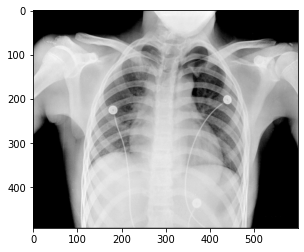

In [36]:
plt.imshow(gray_image, cmap = 'gray', vmin = 0, vmax = 255)

### Part 2: Data type of each pixel

To get the data type of each pixel we can use `numpy.ndarray.dtype` attribute:

In [37]:
gray_image.dtype

dtype('uint8')

So, each pixel intensity is stored in an unsigned integer which can support the range of [0, 255].

### Part 3: Memory usage of each image

for the original image, each pixel has 3 values corresponding to its 3 channels. These values are stored in an `uint8` number so each of them use 8bits(1 byte) of memory. So the total usage is: 493 * 600 * 3 = 887.4 KB

in grayscale image, each pixel has a single value. This value is stored in an `uint8` number so it uses 8bits(1 byte) of memory. So the total usage is: 493 * 600 * 1 = 295.8 KB

We can confirm our calculations, using `numpy.ndarray.nbytes` attribute:

In [38]:
print(f'Total memory used by the color image: {image.nbytes / 1000} KB')
print(f'Total memory used by the grayscale image: {gray_image.nbytes / 1000} KB')

Total memory used by the color image: 1183.2 KB
Total memory used by the grayscale image: 295.8 KB


### Part 4: Cropping the image

In this part, we need to crop the left chest of the patient. So, we can crop the right half of the image:

In [39]:
cropped_gray_image = image[:, gray_image.shape[1] // 2:]

Lets see the result:

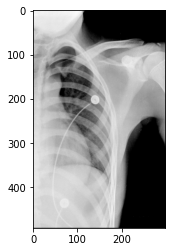

In [40]:
plt.imshow(cropped_gray_image, cmap = 'gray', vmin = 0, vmax = 255)

### Part 5: Flip the image with respect to X coordinate

Considering that the X coordinate is the vertical coordinate, we can use `cv2.flip()` function to flip our image. 

In [41]:
flipped_gray_image = cv.flip(cropped_gray_image, 1)

And the result is:

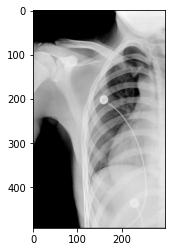

In [42]:
plt.imshow(flipped_gray_image, cmap = 'gray', vmin = 0, vmax = 255)

### Part 7: Visualizing all results

Finally, we must create a plot with 2 rows and 3 columns and show our results in the first row of the plot.

We should take care about `vmin` and `vmax` parameters and set them to 0 and 255 respectively.

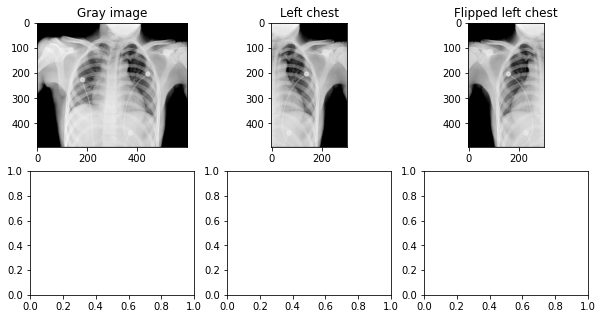

In [43]:
fig, ax = plt.subplots(2, 3, figsize = (10, 5))

ax[0, 0].imshow(gray_image, cmap='gray', vmin = 0, vmax = 255)
ax[0, 0].set_title('Gray image')

ax[0, 1].imshow(cropped_gray_image, cmap='gray', vmin = 0, vmax = 255)
ax[0, 1].set_title('Left chest')

ax[0, 2].imshow(flipped_gray_image, cmap='gray', vmin = 0, vmax = 255)
ax[0, 2].set_title('Flipped left chest')

plt.show()